In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Image-focused EDA — Serial checklist**

In [2]:
import os, glob, re
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm

DATA_ROOT = "/kaggle/input/datasets/opudas/prbd-dataset/PRBD Microscopic Image of Different Processed Rice"

ORIG_DIR = os.path.join(DATA_ROOT, "Original_Images")
AUG_DIR  = os.path.join(DATA_ROOT, "Augmented_images")

EXTS = ("*.jpg","*.jpeg","*.png","*.bmp","*.webp")

def list_images(base_dir, subset_name):
    rows=[]
    for cls in sorted(os.listdir(base_dir)):
        cdir = os.path.join(base_dir, cls)
        if not os.path.isdir(cdir): 
            continue
        files=[]
        for e in EXTS:
            files += glob.glob(os.path.join(cdir, e))
        for fp in files:
            rows.append({"path": fp, "label": cls, "subset": subset_name})
    return pd.DataFrame(rows)

df_o = list_images(ORIG_DIR, "original")
df_a = list_images(AUG_DIR, "augmented")

print("Original:", len(df_o), "Augmented:", len(df_a), "Classes:", df_o["label"].nunique())
df_o.head()

Original: 2000 Augmented: 8000 Classes: 10


,path,label,subset
0,/kaggle/input/datasets/opudas/prbd-dataset/PRB...,Aush,original
1,/kaggle/input/datasets/opudas/prbd-dataset/PRB...,Aush,original
2,/kaggle/input/datasets/opudas/prbd-dataset/PRB...,Aush,original
3,/kaggle/input/datasets/opudas/prbd-dataset/PRB...,Aush,original
4,/kaggle/input/datasets/opudas/prbd-dataset/PRB...,Aush,original


**Class balance (Original vs Augmented)**

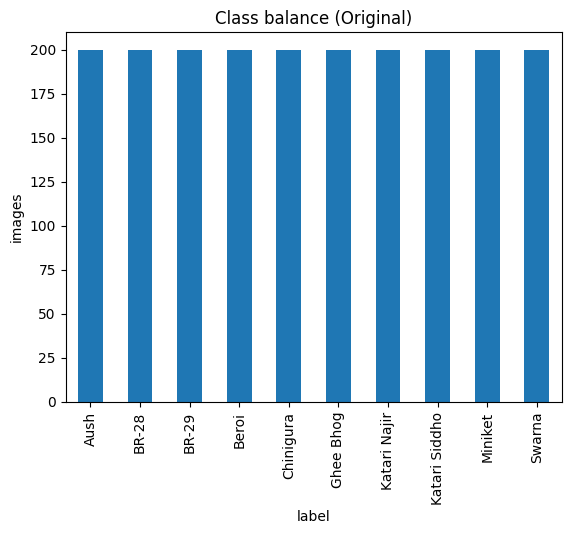

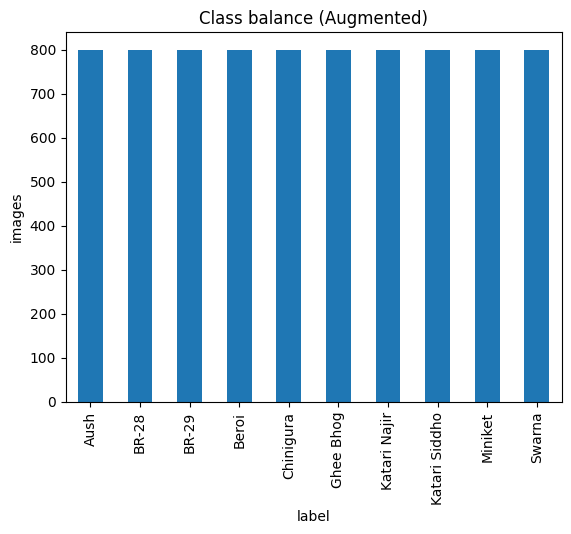

(label
 Aush             200
 BR-28            200
 BR-29            200
 Beroi            200
 Chinigura        200
 Ghee Bhog        200
 Katari Najir     200
 Katari Siddho    200
 Miniket          200
 Swarna           200
 Name: count, dtype: int64,
 label
 Aush             800
 BR-28            800
 BR-29            800
 Beroi            800
 Chinigura        800
 Ghee Bhog        800
 Katari Najir     800
 Katari Siddho    800
 Miniket          800
 Swarna           800
 Name: count, dtype: int64)

In [3]:
import matplotlib.pyplot as plt

orig_counts = df_o["label"].value_counts().sort_index()
aug_counts  = df_a["label"].value_counts().sort_index()

plt.figure()
orig_counts.plot(kind="bar")
plt.title("Class balance (Original)")
plt.ylabel("images")
plt.show()

plt.figure()
aug_counts.plot(kind="bar")
plt.title("Class balance (Augmented)")
plt.ylabel("images")
plt.show()

orig_counts, aug_counts

**Resolution + Aspect ratio distribution**

100%|██████████| 2000/2000 [00:09<00:00, 214.12it/s]


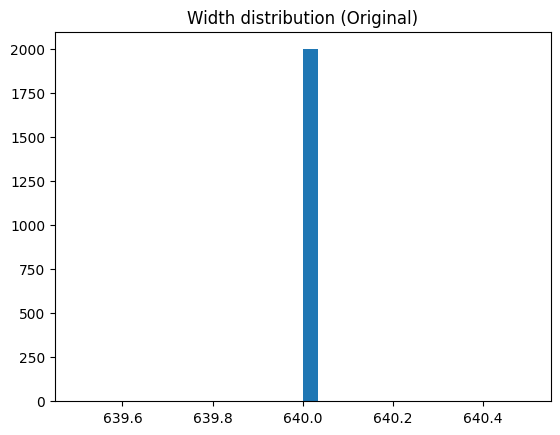

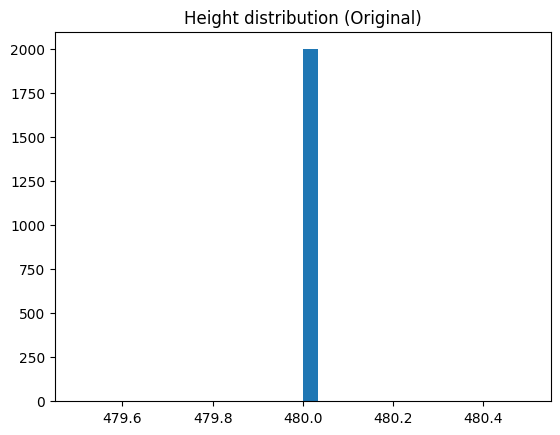

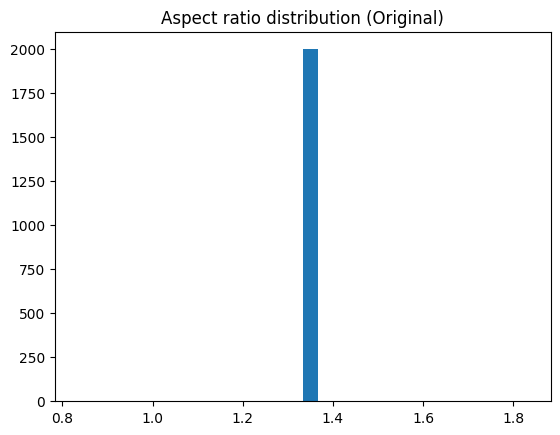

W                                                     H  \
               count   mean  std    min    25%    50%    75%    max  count   
label                                                                        
Aush           200.0  640.0  0.0  640.0  640.0  640.0  640.0  640.0  200.0   
BR-28          200.0  640.0  0.0  640.0  640.0  640.0  640.0  640.0  200.0   
BR-29          200.0  640.0  0.0  640.0  640.0  640.0  640.0  640.0  200.0   
Beroi          200.0  640.0  0.0  640.0  640.0  640.0  640.0  640.0  200.0   
Chinigura      200.0  640.0  0.0  640.0  640.0  640.0  640.0  640.0  200.0   
Ghee Bhog      200.0  640.0  0.0  640.0  640.0  640.0  640.0  640.0  200.0   
Katari Najir   200.0  640.0  0.0  640.0  640.0  640.0  640.0  640.0  200.0   
Katari Siddho  200.0  640.0  0.0  640.0  640.0  640.0  640.0  640.0  200.0   
Miniket        200.0  640.0  0.0  640.0  640.0  640.0  640.0  640.0  200.0   
Swarna         200.0  640.0  0.0  640.0  640.0  640.0  640.0  640.0  200.0   

                      ...               aspect                               \
                mean  ...    75%    max  count  mean  std   min   25%   50%   
label                 ...                                                     
Aush           480.0  ...  480.0  480.0  200.0  1.33  0.0  1.33  1.33  1.33   
BR-28          480.0  ...  480.0  480.0  200.0  1.33  0.0  1.33  1.33  1.33   
BR-29          480.0  ...  480.0  480.0  200.0  1.33  0.0  1.33  1.33  1.33   
Beroi          480.0  ...  480.0  480.0  200.0  1.33  0.0  1.33  1.33  1.33   
Chinigura      480.0  ...  480.0  480.0  200.0  1.33  0.0  1.33  1.33  1.33   
Ghee Bhog      480.0  ...  480.0  480.0  200.0  1.33  0.0  1.33  1.33  1.33   
Katari Najir   480.0  ...  480.0  480.0  200.0  1.33  0.0  1.33  1.33  1.33   
Katari Siddho  480.0  ...  480.0  480.0  200.0  1.33  0.0  1.33  1.33  1.33   
Miniket        480.0  ...  480.0  480.0  200.0  1.33  0.0  1.33  1.33  1.33   
Swarna         480.0  ...  480.0  480.0  200.0  1.33  0.0  1.33  1.33  1.33   

                           
                75%   max  
label                      
Aush           1.33  1.33  
BR-28          1.33  1.33  
BR-29          1.33  1.33  
Beroi          1.33  1.33  
Chinigura      1.33  1.33  
Ghee Bhog      1.33  1.33  
Katari Najir   1.33  1.33  
Katari Siddho  1.33  1.33  
Miniket        1.33  1.33  
Swarna         1.33  1.33  

[10 rows x 24 columns]

In [4]:
def read_rgb(fp):
    return np.array(Image.open(fp).convert("RGB"))

rows=[]
for r in tqdm(df_o.itertuples(), total=len(df_o)):
    img = Image.open(r.path)
    w,h = img.size
    rows.append({"path": r.path, "label": r.label, "W": w, "H": h, "aspect": w/h})

res_o = pd.DataFrame(rows)

plt.figure()
plt.hist(res_o["W"], bins=30)
plt.title("Width distribution (Original)")
plt.show()

plt.figure()
plt.hist(res_o["H"], bins=30)
plt.title("Height distribution (Original)")
plt.show()

plt.figure()
plt.hist(res_o["aspect"], bins=30)
plt.title("Aspect ratio distribution (Original)")
plt.show()

res_o.groupby("label")[["W","H","aspect"]].describe().round(2)

**Resizing/Padding strategy (implementation stub):**

In [6]:
import cv2

def resize_pad_square(img_rgb, size=224):
    h,w = img_rgb.shape[:2]
    scale = size / min(h,w)
    nh, nw = int(h*scale), int(w*scale)
    resized = cv2.resize(img_rgb, (nw, nh), interpolation=cv2.INTER_AREA)

    top = (size - nh)//2 if nh < size else 0
    bottom = size - nh - top if nh < size else 0
    left = (size - nw)//2 if nw < size else 0
    right = size - nw - left if nw < size else 0
    padded = cv2.copyMakeBorder(resized, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(0,0,0))
    return padded

**RGB histograms + Per-image mean/std + Per-class mean/std**

In [7]:
import cv2

def rgb_hsv_stats(fp):
    img = read_rgb(fp)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

    rgb_mean = img.reshape(-1,3).mean(0)
    rgb_std  = img.reshape(-1,3).std(0)

    hsv_mean = hsv.reshape(-1,3).mean(0)
    hsv_std  = hsv.reshape(-1,3).std(0)

    return rgb_mean, rgb_std, hsv_mean, hsv_std

rows=[]
for r in tqdm(df_o.itertuples(), total=len(df_o)):
    rgb_m, rgb_s, hsv_m, hsv_s = rgb_hsv_stats(r.path)
    rows.append({
        "path": r.path, "label": r.label,
        "rgb_mean_r": rgb_m[0], "rgb_mean_g": rgb_m[1], "rgb_mean_b": rgb_m[2],
        "rgb_std_r": rgb_s[0],  "rgb_std_g": rgb_s[1],  "rgb_std_b": rgb_s[2],
        "hsv_mean_h": hsv_m[0], "hsv_mean_s": hsv_m[1], "hsv_mean_v": hsv_m[2],
        "hsv_std_h": hsv_s[0],  "hsv_std_s": hsv_s[1],  "hsv_std_v": hsv_s[2],
    })
stats_o = pd.DataFrame(rows)


stats_o.groupby("label")[["rgb_mean_r","rgb_mean_g","rgb_mean_b",
                          "hsv_mean_h","hsv_mean_s","hsv_mean_v"]].agg(["mean","std"]).round(2)

100%|██████████| 2000/2000 [02:06<00:00, 15.82it/s]


rgb_mean_r        rgb_mean_g        rgb_mean_b         \
                    mean    std       mean    std       mean    std   
label                                                                 
Aush               44.54  11.42      26.25  10.17      34.25  12.41   
BR-28              51.55   8.71      41.20   7.17      51.24   8.71   
BR-29              46.90   5.37      36.34   4.23      46.32   4.96   
Beroi              30.34   5.91      19.52   5.61      28.08   7.58   
Chinigura          41.01   4.81      33.34   3.84      38.77   4.87   
Ghee Bhog          45.08   4.00      35.91   3.32      42.69   3.93   
Katari Najir       38.55   7.29      30.56   5.90      38.78   7.34   
Katari Siddho      37.08   5.61      28.94   4.37      35.96   5.16   
Miniket            57.26   6.56      46.69   5.42      57.39   6.69   
Swarna             47.78   5.77      37.60   4.66      44.79   5.31   

              hsv_mean_h       hsv_mean_s        hsv_mean_v         
                    mean   std       mean    std       mean    std  
label                                                               
Aush               51.68  6.13      49.60  12.65      44.73  11.55  
BR-28              42.33  5.97      15.75   2.32      52.37   8.81  
BR-29              37.84  3.57      15.41   1.87      47.45   5.27  
Beroi              35.22  3.79      25.09   6.19      31.29   6.59  
Chinigura          31.15  3.62      10.13   1.57      41.06   4.81  
Ghee Bhog          34.37  2.82      11.91   1.24      45.21   4.00  
Katari Najir       32.46  4.84      12.82   1.95      39.25   7.36  
Katari Siddho      30.47  3.94      11.88   1.47      37.46   5.57  
Miniket            47.58  4.74      17.21   1.83      58.44   6.67  
Swarna             38.30  3.84      13.57   1.36      47.89   5.76

**Overall RGB & HSV histogram plot (quick):**

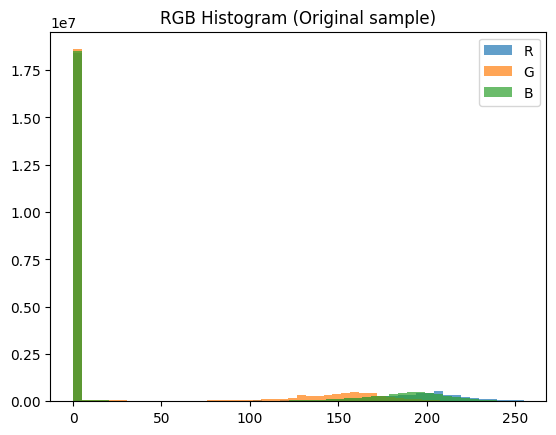

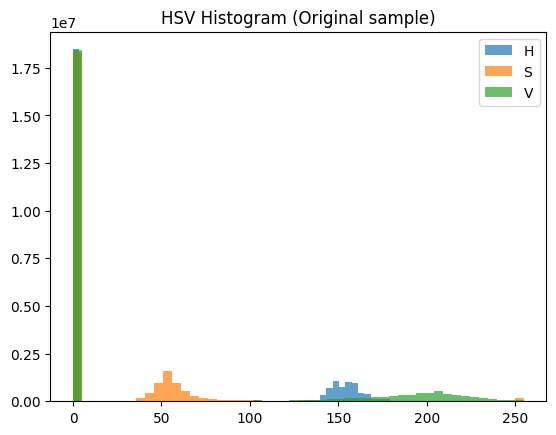

In [8]:
def plot_rgb_hsv_hist(sample_paths, title=""):
    import matplotlib.pyplot as plt
    Rs,Gs,Bs, Hs,Ss,Vs = [],[],[], [],[],[]
    for fp in sample_paths:
        img = read_rgb(fp)
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        Rs.append(img[...,0].ravel()); Gs.append(img[...,1].ravel()); Bs.append(img[...,2].ravel())
        Hs.append(hsv[...,0].ravel()); Ss.append(hsv[...,1].ravel()); Vs.append(hsv[...,2].ravel())

    R = np.concatenate(Rs); G=np.concatenate(Gs); B=np.concatenate(Bs)
    H = np.concatenate(Hs); S=np.concatenate(Ss); V=np.concatenate(Vs)

    plt.figure(); plt.hist(R, bins=50, alpha=0.7, label="R"); plt.hist(G, bins=50, alpha=0.7, label="G"); plt.hist(B, bins=50, alpha=0.7, label="B")
    plt.legend(); plt.title("RGB Histogram " + title); plt.show()

    plt.figure(); plt.hist(H, bins=50, alpha=0.7, label="H"); plt.hist(S, bins=50, alpha=0.7, label="S"); plt.hist(V, bins=50, alpha=0.7, label="V")
    plt.legend(); plt.title("HSV Histogram " + title); plt.show()

sample = df_o.sample(min(80, len(df_o)), random_state=42)["path"].tolist()
plot_rgb_hsv_hist(sample, "(Original sample)")

**Brightness/Contrast spread + Saturation clipping**

100%|██████████| 2000/2000 [00:24<00:00, 81.66it/s]


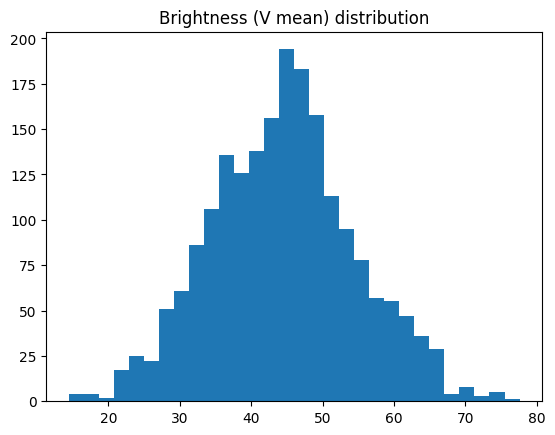

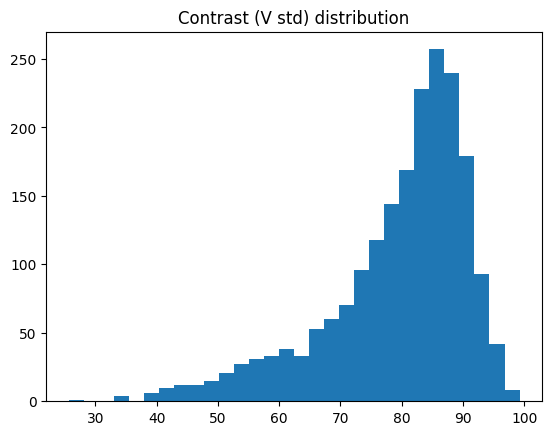

brightness                       contrast                      \
                    mean      std     median       mean      std     median   
label                                                                         
Aush           44.733898  11.5502  44.827999  67.970703  13.6419  68.951202   
BR-28          52.365601   8.8107  52.339401  85.021301   7.1842  85.839302   
BR-29          47.447300   5.2713  47.532101  83.933800   6.0803  83.871002   
Beroi          31.294701   6.5898  31.147301  59.522701  10.5032  59.162498   
Chinigura      41.061699   4.8100  40.284000  84.446503   3.9770  84.620903   
Ghee Bhog      45.206501   3.9975  45.304001  87.091202   4.0051  87.409798   
Katari Najir   39.249802   7.3602  38.165298  75.761497   8.0541  75.829399   
Katari Siddho  37.464298   5.5665  37.100101  76.455498   6.1541  76.727097   
Miniket        58.438000   6.6652  59.165199  87.530998   4.9248  88.306198   
Swarna         47.888699   5.7592  48.329899  85.811096   5.9878  86.814598   

              sat_clip_low                 sat_clip_high                  
                      mean     std  median          mean     std  median  
label                                                                     
Aush                0.6357  0.0356  0.6338        0.0440  0.0379  0.0366  
BR-28               0.7191  0.0396  0.7202        0.0007  0.0002  0.0007  
BR-29               0.7497  0.0229  0.7474        0.0008  0.0003  0.0007  
Beroi               0.7657  0.0242  0.7655        0.0045  0.0091  0.0018  
Chinigura           0.8029  0.0244  0.8070        0.0016  0.0006  0.0015  
Ghee Bhog           0.7813  0.0182  0.7816        0.0008  0.0003  0.0007  
Katari Najir        0.7822  0.0325  0.7872        0.0010  0.0004  0.0009  
Katari Siddho       0.8015  0.0238  0.8035        0.0008  0.0002  0.0008  
Miniket             0.6815  0.0309  0.6810        0.0016  0.0004  0.0016  
Swarna              0.7574  0.0232  0.7543        0.0005  0.0001  0.0005

In [9]:
def brightness_contrast_satclip(fp):
    img = read_rgb(fp)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    V = hsv[...,2].astype(np.float32)
    S = hsv[...,1].astype(np.float32)
    brightness = V.mean()
    contrast = V.std()
    sat_low = (S <= 3).mean()
    sat_high = (S >= 252).mean()
    return brightness, contrast, sat_low, sat_high

rows=[]
for r in tqdm(df_o.itertuples(), total=len(df_o)):
    br, ct, sl, sh = brightness_contrast_satclip(r.path)
    rows.append({"path": r.path, "label": r.label,
                 "brightness": br, "contrast": ct,
                 "sat_clip_low": sl, "sat_clip_high": sh})
bc = pd.DataFrame(rows)

import matplotlib.pyplot as plt

plt.figure()
plt.hist(bc["brightness"], bins=30)
plt.title("Brightness (V mean) distribution")
plt.show()

plt.figure()
plt.hist(bc["contrast"], bins=30)
plt.title("Contrast (V std) distribution")
plt.show()

bc.groupby("label")[["brightness","contrast","sat_clip_low","sat_clip_high"]].agg(["mean","std","median"]).round(4)

**Sharpness/Noise — Laplacian variance + light noise proxy**

100%|██████████| 2000/2000 [00:27<00:00, 71.94it/s]


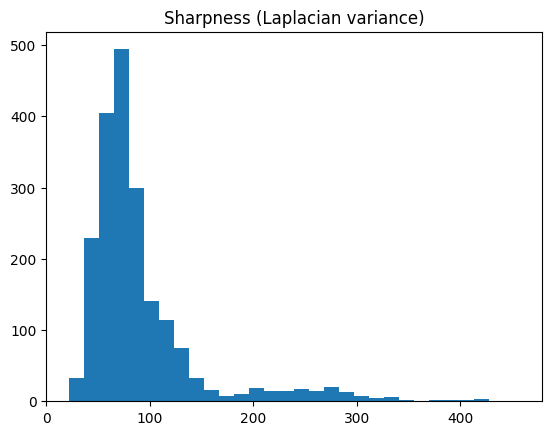

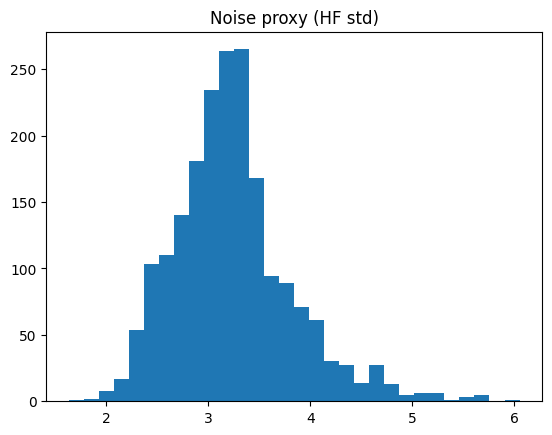

lap_var                  noise_proxy              
                  mean     std   median        mean    std median
label                                                            
Aush           234.986  75.100  234.597       4.237  0.669  4.298
BR-28           81.721  19.414   79.476       3.319  0.365  3.321
BR-29           53.631   9.122   53.451       2.899  0.275  2.908
Beroi           89.797  19.232   86.888       2.700  0.306  2.672
Chinigura       80.499   9.750   80.772       3.216  0.184  3.227
Ghee Bhog       57.817  10.615   58.146       3.024  0.280  3.055
Katari Najir    48.690  10.673   49.127       2.589  0.286  2.602
Katari Siddho   77.863  11.185   78.287       3.301  0.244  3.325
Miniket        120.980  17.698  118.693       3.862  0.236  3.875
Swarna          68.043  10.226   68.001       3.241  0.227  3.265

In [10]:
def sharpness_noise(fp):
    img = read_rgb(fp)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    lap = cv2.Laplacian(gray, cv2.CV_64F)
    lap_var = lap.var()

    blur = cv2.GaussianBlur(gray, (0,0), sigmaX=1.2)
    hf = (gray.astype(np.float32) - blur.astype(np.float32))
    noise_proxy = hf.std()
    return lap_var, noise_proxy

rows=[]
for r in tqdm(df_o.itertuples(), total=len(df_o)):
    sh, nz = sharpness_noise(r.path)
    rows.append({"path": r.path, "label": r.label, "lap_var": sh, "noise_proxy": nz})
sn = pd.DataFrame(rows)

plt.figure(); plt.hist(sn["lap_var"], bins=30); plt.title("Sharpness (Laplacian variance)"); plt.show()
plt.figure(); plt.hist(sn["noise_proxy"], bins=30); plt.title("Noise proxy (HF std)"); plt.show()

sn.groupby("label")[["lap_var","noise_proxy"]].agg(["mean","std","median"]).round(3)

**White balance sanity — Gray-world check**

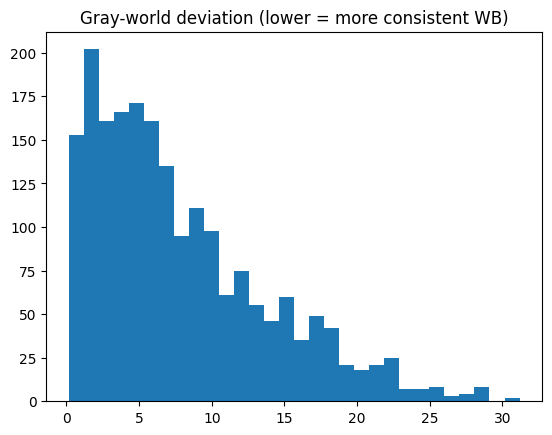

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
Aush,200.0,10.5126,6.4558,0.9412,5.2766,9.0250,14.8204,30.9509
BR-28,200.0,9.4806,6.6121,0.1529,4.2572,8.4764,14.2083,31.1782
BR-29,200.0,4.8398,3.3216,0.3357,1.9460,4.4609,6.7145,14.3427
Beroi,200.0,13.9493,6.0453,1.4529,10.0183,13.5508,17.9916,28.5883
Chinigura,200.0,4.1152,2.7818,0.6076,1.7853,3.5097,5.6405,13.7011
Ghee Bhog,200.0,3.1911,2.3470,0.5706,1.3720,2.4246,4.3161,13.7345
Katari Najir,200.0,6.6729,4.1196,0.9419,3.5396,6.2657,9.2217,17.9946
Katari Siddho,200.0,6.4928,4.0977,0.4576,3.3975,5.9603,9.2580,21.7620
Miniket,200.0,14.1526,5.7420,1.8397,10.0107,14.6525,18.1294,28.9533


In [11]:

m = stats_o[["rgb_mean_r","rgb_mean_g","rgb_mean_b"]].values
overall = m.mean(0)
grayworld_delta = np.abs(m - overall).mean(1)
stats_o["grayworld_delta"] = grayworld_delta

import matplotlib.pyplot as plt
plt.figure()
plt.hist(stats_o["grayworld_delta"], bins=30)
plt.title("Gray-world deviation (lower = more consistent WB)")
plt.show()

stats_o.groupby("label")["grayworld_delta"].describe().round(4)

**Duplicate detection — perceptual hashing (pHash)**

In [12]:
!pip -q install ImageHash
import imagehash
from collections import defaultdict

def phash(fp):
    return imagehash.phash(Image.open(fp).convert("RGB"))


ph_rows=[]
for r in tqdm(df_o.itertuples(), total=len(df_o)):
    ph_rows.append({"path": r.path, "label": r.label, "phash": str(phash(r.path))})
ph = pd.DataFrame(ph_rows)


dup_exact = ph.groupby("phash").filter(lambda x: len(x) > 1).sort_values("phash")
print("Exact-duplicate groups:", dup_exact["phash"].nunique())
dup_exact.head(10)

100%|██████████| 2000/2000 [00:22<00:00, 90.58it/s] 


Exact-duplicate groups: 3


,path,label,phash
1011,/kaggle/input/datasets/opudas/prbd-dataset/PRB...,Ghee Bhog,973868c795384b37
1598,/kaggle/input/datasets/opudas/prbd-dataset/PRB...,Katari Siddho,973868c795384b37
269,/kaggle/input/datasets/opudas/prbd-dataset/PRB...,BR-28,c29e3861cfe6cc19
371,/kaggle/input/datasets/opudas/prbd-dataset/PRB...,BR-28,c29e3861cfe6cc19
811,/kaggle/input/datasets/opudas/prbd-dataset/PRB...,Chinigura,cf9830676d1bc698
925,/kaggle/input/datasets/opudas/prbd-dataset/PRB...,Chinigura,cf9830676d1bc698


**Near-duplicate (Hamming distance) — small sample (fast)**

In [13]:

sample_ph = ph.sample(min(400, len(ph)), random_state=42).reset_index(drop=True)
hash_objs = [imagehash.hex_to_hash(h) for h in sample_ph["phash"].tolist()]

pairs=[]
for i in range(len(hash_objs)):
    for j in range(i+1, len(hash_objs)):
        d = hash_objs[i] - hash_objs[j]  # hamming distance
        if d <= 5:
            pairs.append((i,j,d))
print("Near-duplicate pairs (sample):", len(pairs))
pairs[:10]

Near-duplicate pairs (sample): 22


[(4, 264, 4),
 (5, 125, 4),
 (5, 368, 4),
 (9, 291, 4),
 (9, 292, 4),
 (12, 58, 4),
 (42, 115, 4),
 (42, 266, 2),
 (52, 182, 4),
 (55, 89, 4)]

**Leakage safeguard — split ONLY original + group safety**

In [14]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(df_o, test_size=0.30, random_state=42, stratify=df_o["label"])
val_df, test_df   = train_test_split(temp_df, test_size=0.50, random_state=42, stratify=temp_df["label"])

print(len(train_df), len(val_df), len(test_df))
train_df["label"].value_counts().head()

1400 300 300


label
Chinigura        140
Katari Siddho    140
Miniket          140
Ghee Bhog        140
Beroi            140
Name: count, dtype: int64

**Augmentation probe — safe vs harmful (quick experiment)**

In [16]:
!pip -q install -U albumentations

import albumentations as A
import cv2, numpy as np

augs = {
  "hflip": A.HorizontalFlip(p=1.0),

  
  "random_crop": A.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0), ratio=(0.9, 1.1), p=1.0),

  "color_jitter": A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05, p=1.0),

  "gaussian_blur": A.GaussianBlur(blur_limit=(3, 7), p=1.0),
}

In [18]:
from PIL import Image

def read_rgb(fp):
    return np.array(Image.open(fp).convert("RGB"))

def brightness_contrast_satclip_from_img(img_rgb):
    hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    V = hsv[...,2].astype(np.float32)
    S = hsv[...,1].astype(np.float32)
    brightness = V.mean()
    contrast   = V.std()
    sat_low    = (S <= 3).mean()
    sat_high   = (S >= 252).mean()
    return brightness, contrast, sat_low, sat_high

def summarize_shift(paths, aug):
    shifts=[]
    for fp in paths:
        img = read_rgb(fp)

        br0, ct0, sl0, sh0 = brightness_contrast_satclip_from_img(img)

        out = aug(image=img)["image"]
        br1, ct1, sl1, sh1 = brightness_contrast_satclip_from_img(out)

        shifts.append([br1-br0, ct1-ct0, sl1-sl0, sh1-sh0])
    shifts = np.array(shifts)
    return shifts.mean(0), shifts.std(0)

In [19]:
probe_paths = df_o.sample(min(200, len(df_o)), random_state=42)["path"].tolist()

for name, aug in augs.items():
    mu, sd = summarize_shift(probe_paths, aug)
    print(
        name,
        "mean_shift[brightness, contrast, sat_low, sat_high] =",
        np.round(mu, 4),
        " std=",
        np.round(sd, 4)
    )

hflip mean_shift[brightness, contrast, sat_low, sat_high] = [-0.  0.  0.  0.]  std= [0. 0. 0. 0.]
random_crop mean_shift[brightness, contrast, sat_low, sat_high] = [ 9.1780e+00  4.8829e+00 -5.1700e-02  2.0000e-04]  std= [1.7232 0.9985 0.0091 0.002 ]
color_jitter mean_shift[brightness, contrast, sat_low, sat_high] = [ 7.69e-01 -2.15e+00  1.80e-03 -2.20e-03]  std= [5.82660e+00 1.14462e+01 4.20000e-03 1.29000e-02]
gaussian_blur mean_shift[brightness, contrast, sat_low, sat_high] = [-0.0183 -0.4002 -0.0052 -0.0012]  std= [0.0116 0.1764 0.0023 0.004 ]
